In [146]:
import pandas as pd
import numpy as np
import matplotlib
from plotnine import *
import plotly.express as px

# Carga de los datos

In [147]:
obesidad = pd.read_csv("Data/obesity.csv")

|Variable Name|	Role|	Type	|Demographic	|Description|	Units	|Missing Values|
|----------|:---------|:---------|:---------|:---------|:---------|:---------|
|Gender|	Feature|	Categorical|	Gender|			| |no|
|Age|	Feature|	Continuous|	Age|	 |		|no|
|Height|	Feature|	Continuous|		 |		| |no|
|Weight|	Feature|	Continuous|		 |		| |no|
|family_history_with_overweight|	Feature|	Binary|	| 	Has a family member suffered or suffers from overweight?|		|no|
|FAVC|	Feature|	Binary|	  | Do you eat high caloric food frequently?|		|no|
|FCVC|	Feature|	Integer|	 | Do you usually eat vegetables in your meals?|		|no|
|NCP|	Feature|	Continuous|	 | How many main meals do you have daily?|		|no|
|CAEC|	Feature|	Categorical|  | Do you eat any food between meals?|		|no|
|SMOKE|	Feature|	Binary|	| Do you smoke?|		|no|
|CH2O|	Feature|	Continuous|		|How much water do you drink daily?|		|no|
|SCC|	Feature|	Binary|		|Do you monitor the calories you eat daily?|		|no|
|FAF|	Feature|	Continuous|		|How often do you have physical activity?|		|no|
|TUE|	Feature|	Integer|		|How much time do you use technological devices such as cell phone, videogames, television, computer and others?|		|no|
|CALC|	Feature|	Categorical|		|How often do you drink alcohol?|		|no|
|MTRANS|	Feature|	Categorical|		|Which transportation do you usually use?|		|no|
|NObeyesdad|	Target|	Categorical|		|Obesity level|		|no|

# Procesado de los datos

In [148]:
obesidad.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [149]:
obesidad.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

Cambiamos el nombre de las columnas para facilitar la comprensión

In [150]:
obesidad.columns = ['gender', 'age', 'height', 'weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'obesity_type']

En principio no tiene NAs, pero vamos a asegurarnos

In [151]:
obesidad_sin_nulos = obesidad.dropna()

Veamos si sus caracteristicas sin las mismas

In [152]:
print(obesidad_sin_nulos.shape,obesidad.shape,'son iguales')

(2111, 17) (2111, 17) son iguales


Ahora veamos si hay algun outlier o algún dato incorrecto

In [153]:
columnas_no_numericas=obesidad.select_dtypes(exclude='number').columns
for campo in columnas_no_numericas:
    print(obesidad[campo].unique())
print('Entre los campos no numéricos no se ve ningún elemento incorrecto, pero vamos a dar categorias para poder hacer\nuna buena visualizacion')

['Female' 'Male']
['yes' 'no']
['no' 'yes']
['Sometimes' 'Frequently' 'Always' 'no']
['no' 'yes']
['no' 'yes']
['no' 'Sometimes' 'Frequently' 'Always']
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']
Entre los campos no numéricos no se ve ningún elemento incorrecto, pero vamos a dar categorias para poder hacer
una buena visualizacion


In [154]:
#Para tipos de obesidad
orden_categorias = ['Insufficient_Weight','Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II',
       'Obesity_Type_III']
obesidad['obesity_type'] = pd.Categorical(obesidad['obesity_type'], categories=orden_categorias, ordered=True)
#Para CAEC, ¿comes entre comidas?
orden_categorias = ['no', 'Sometimes', 'Frequently', 'Always']
obesidad['CAEC'] = pd.Categorical(obesidad['CAEC'], categories=orden_categorias, ordered=True)
#Para CALC, ¿bebes alcohol?
orden_categorias = ['no', 'Sometimes', 'Frequently', 'Always']
obesidad['CALC'] = pd.Categorical(obesidad['CALC'], categories=orden_categorias, ordered=True)

Ahora estudiemos las numéricas

In [155]:
obesidad.select_dtypes(include='number').describe()

,age,height,weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Se puede observar que hay mucha gente joven en el estudio, y muy poca muestra para gente mayor 

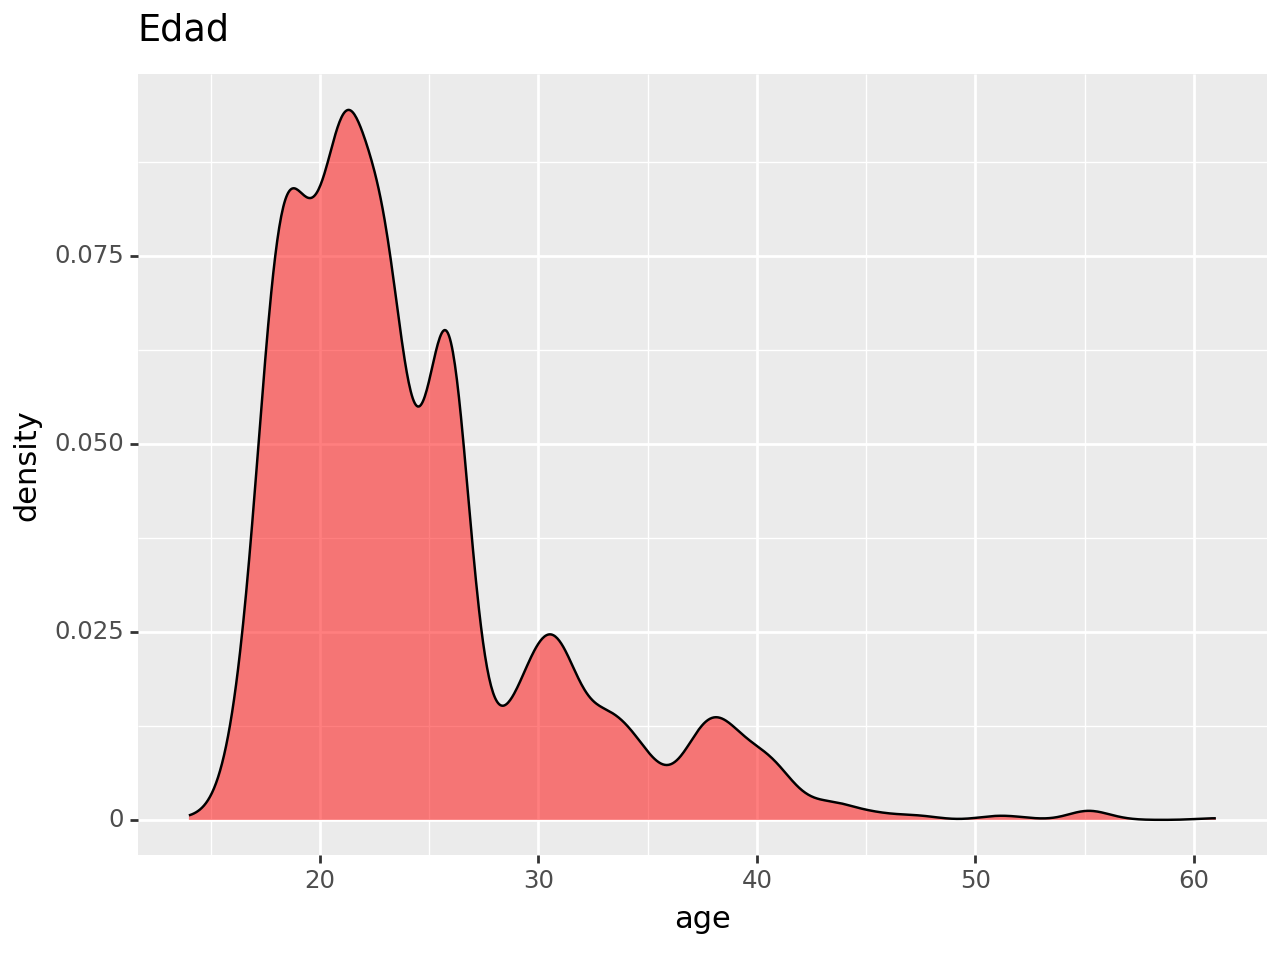


La mayoria de la gente es muy joven, hay baja representatividad de personas mayores


In [156]:
print(ggplot(obesidad, aes(x='age')) + 
      geom_density(fill='red',alpha=0.5)+
 labs(title='Edad')
)
print('La mayoria de la gente es muy joven, hay baja representatividad de personas mayores')

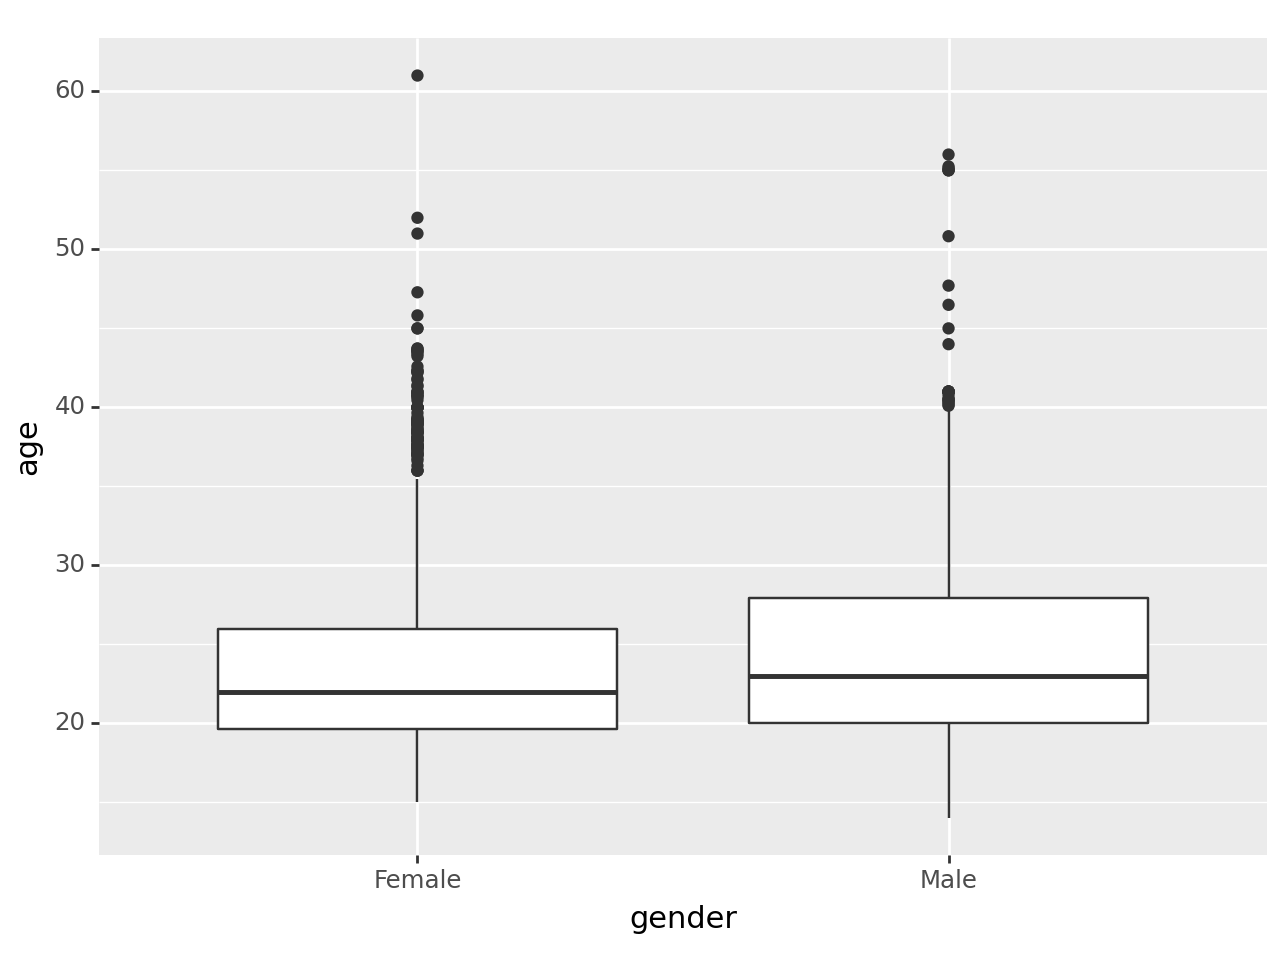

<Figure Size: (640 x 480)>

In [157]:
(ggplot(obesidad, aes(x='gender', y='age')) +
 geom_boxplot())

In [158]:
print('A partir de los 40 años se tiene muy poca representatividad de esta parte la población,\nes por ello que quitamos esos resultados')
obesidad=obesidad.loc[obesidad['age']<=40]

A partir de los 40 años se tiene muy poca representatividad de esta parte la población,
es por ello que quitamos esos resultados


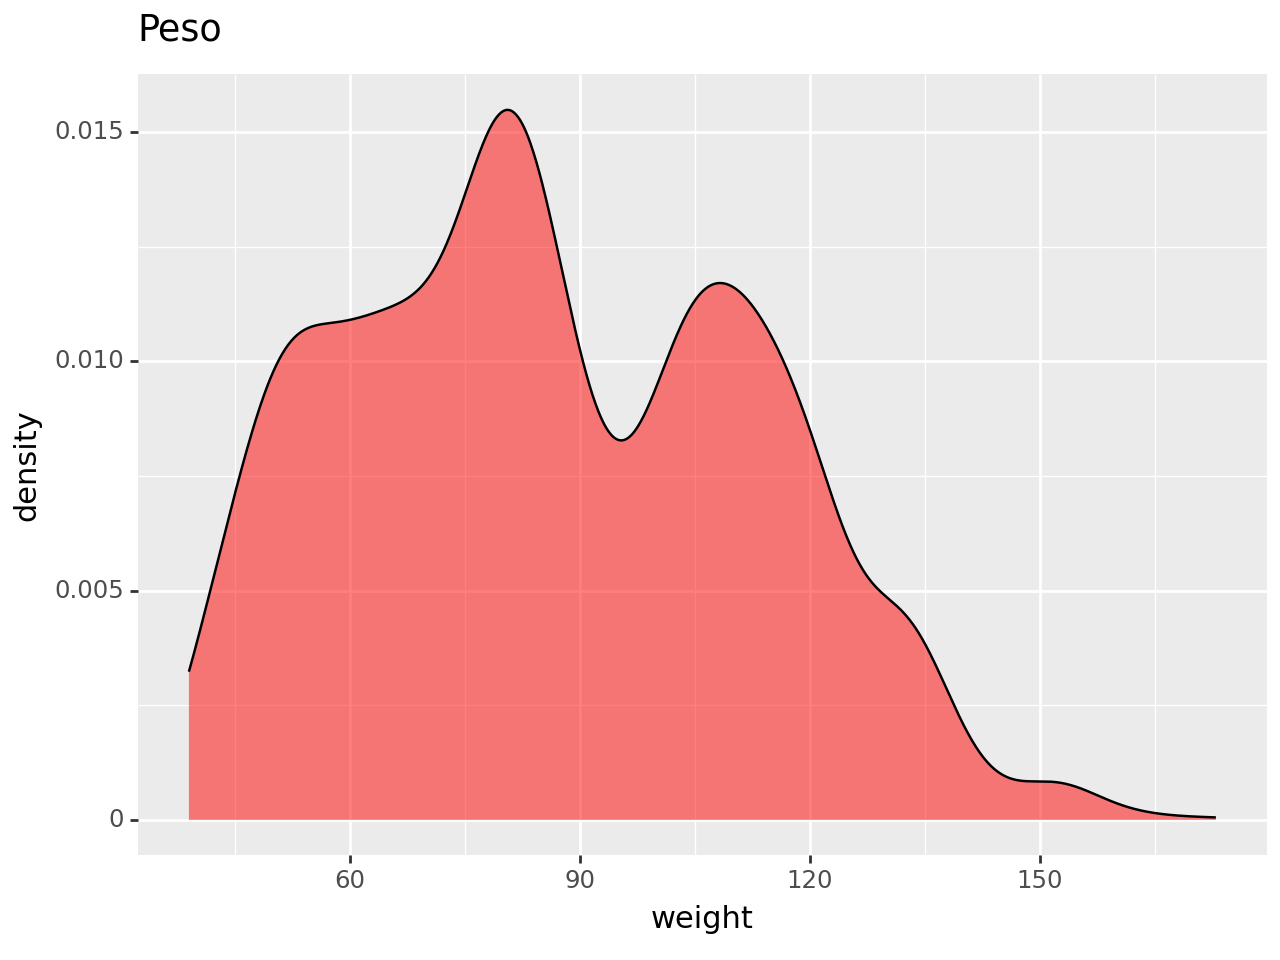


Los datos dados sobre el peso son correctos, tiene un distribución lógica


In [159]:
print(ggplot(obesidad, aes(x='weight')) + 
      geom_density(fill='red',alpha=0.5)+
 labs(title='Peso')
)
print('Los datos dados sobre el peso son correctos, tiene un distribución lógica')

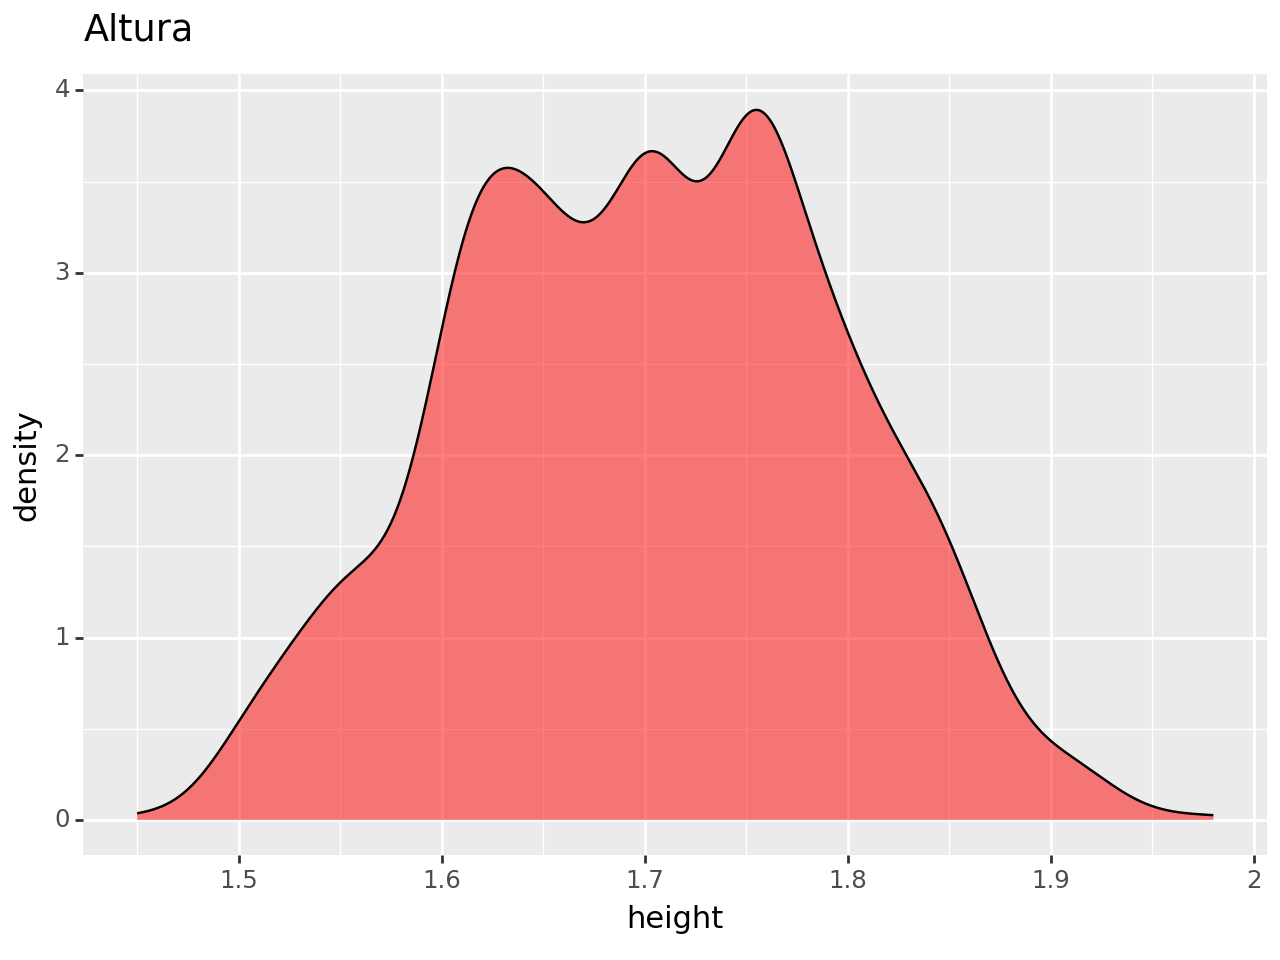


Los datos dados sobre la altura son correctos, tiene un distribución lógica


In [160]:
print(ggplot(obesidad, aes(x='height')) + 
      geom_density(fill='red',alpha=0.5)+
 labs(title='Altura')
)
print('Los datos dados sobre la altura son correctos, tiene un distribución lógica')

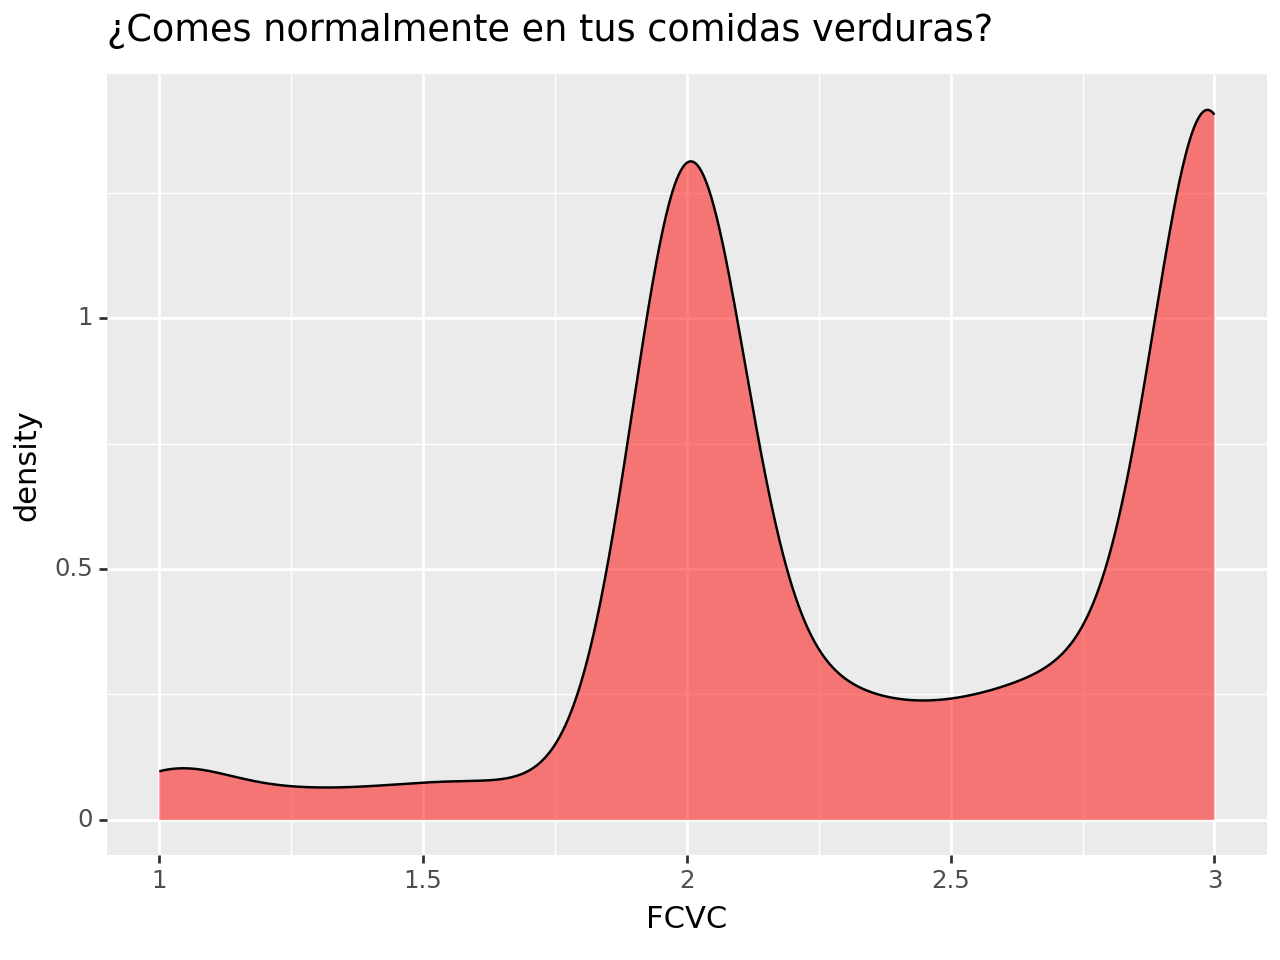


Este campo debe ser categórico, se va a transformar para obtener dicho resultado


In [161]:
print(ggplot(obesidad, aes(x='FCVC')) + 
      geom_density(fill='red',alpha=0.5)+
 labs(title='¿Comes normalmente en tus comidas verduras?')
)
print('Este campo debe ser categórico, se va a transformar para obtener dicho resultado')

In [162]:
def vegetales(verdura):
    if verdura <= 1.5:
        return "Nunca"
    elif verdura <= 2.5:
        return "Algunas veces"
    else:
        return "Siempre"

obesidad['vegetables'] = obesidad['FCVC'].apply(vegetales)
orden_categorias = ["Nunca","Algunas veces","Siempre"]
obesidad['vegetables'] = pd.Categorical(obesidad['vegetables'], categories=orden_categorias, ordered=True)

C:\Users\alexb\AppData\Local\Temp\ipykernel_20064\2898178892.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\alexb\AppData\Local\Temp\ipykernel_20064\2898178892.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [163]:
print(obesidad['vegetables'].unique())

['Algunas veces', 'Siempre', 'Nunca']
Categories (3, object): ['Nunca' < 'Algunas veces' < 'Siempre']


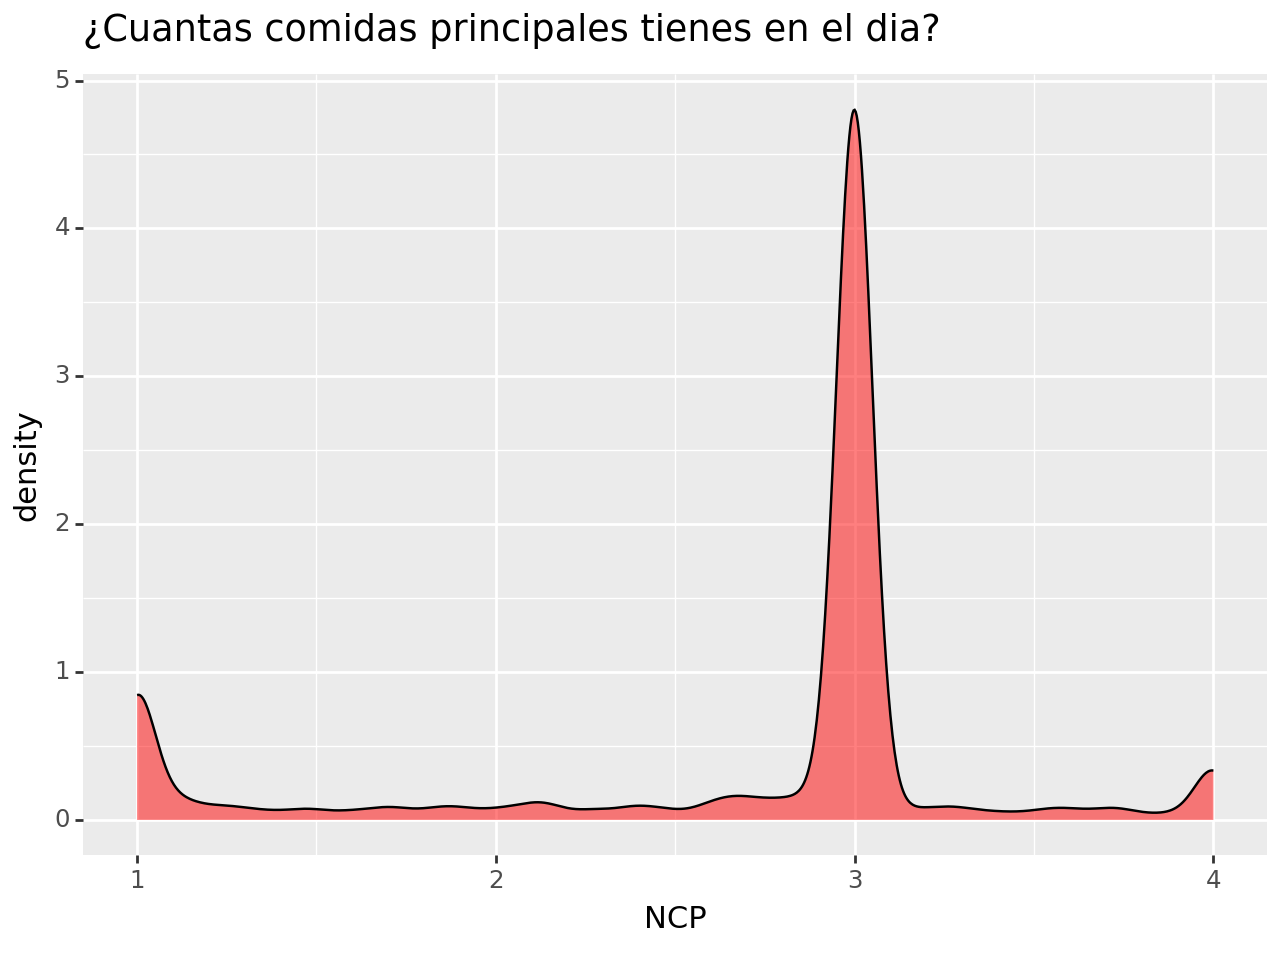


Este campo debe ser categórico, se va a transformar para obtener dicho resultado


In [164]:
print(ggplot(obesidad, aes(x='NCP')) + 
      geom_density(fill='red',alpha=0.5)+
 labs(title='¿Cuantas comidas principales tienes en el dia?')
)
print('Este campo debe ser categórico, se va a transformar para obtener dicho resultado')

In [165]:
def comidas(comida):
    if comida <= 2:
        return "Entre 1 y 2"
    elif comida <= 3.5:
        return "Tres"
    else:
        return "Más de tres"

obesidad['comidas'] = obesidad['NCP'].apply(comidas)
orden_categorias = ["Entre 1 y 2","Tres","Más de tres"]
obesidad['comidas'] = pd.Categorical(obesidad['comidas'], categories=orden_categorias, ordered=True)

C:\Users\alexb\AppData\Local\Temp\ipykernel_20064\3754721060.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\alexb\AppData\Local\Temp\ipykernel_20064\3754721060.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [166]:
print(obesidad['comidas'].unique())

['Tres', 'Entre 1 y 2', 'Más de tres']
Categories (3, object): ['Entre 1 y 2' < 'Tres' < 'Más de tres']


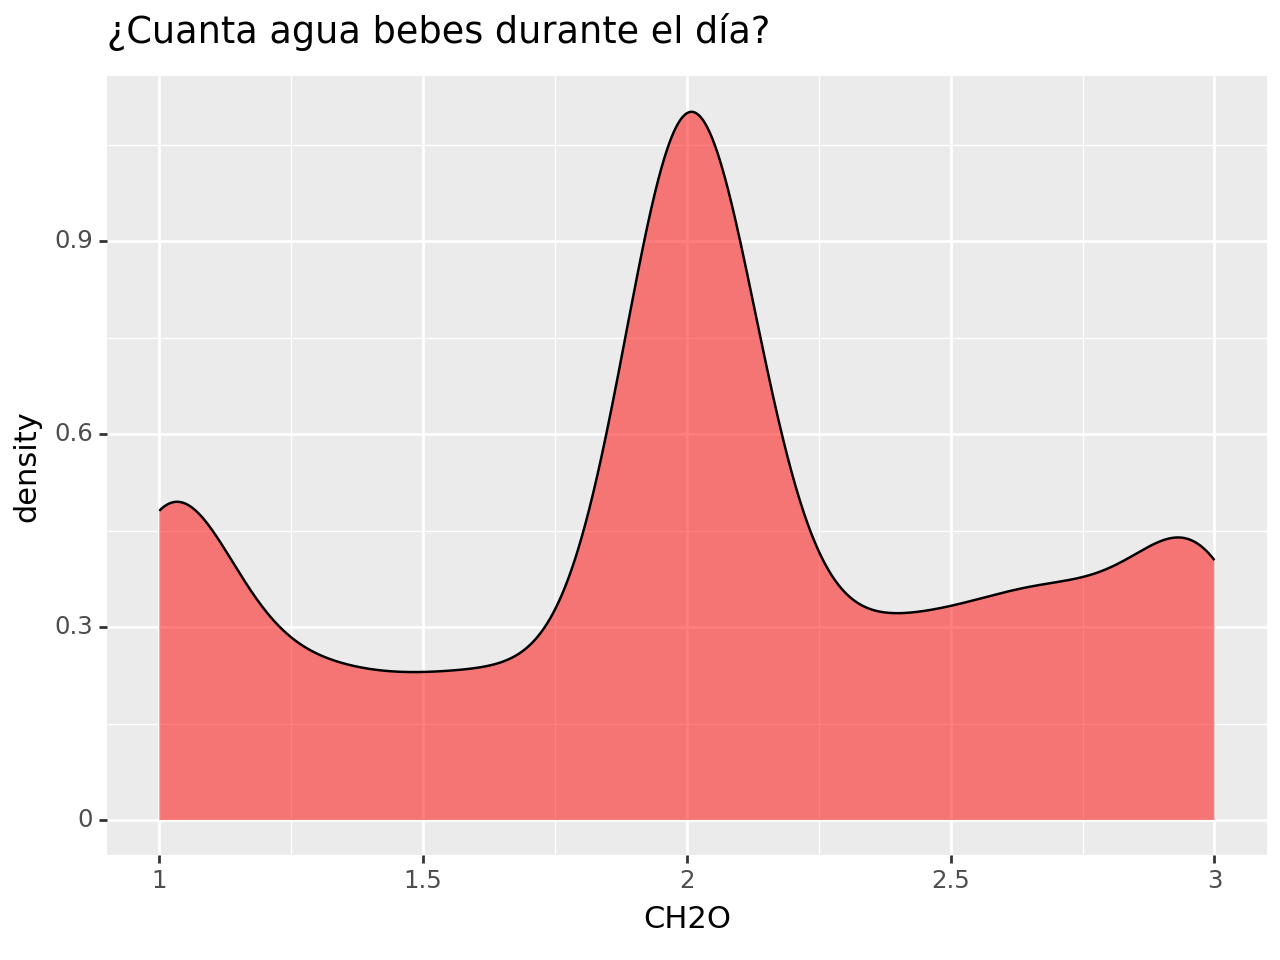


Este campo debe ser categórico, se va a transformar para obtener dicho resultado


In [167]:
print(ggplot(obesidad, aes(x='CH2O')) + 
      geom_density(fill='red',alpha=0.5)+
 labs(title='¿Cuanta agua bebes durante el día?')
)
print('Este campo debe ser categórico, se va a transformar para obtener dicho resultado')

In [168]:
def litros(agua):
    if agua <= 1.5:
        return "Menos de 1L"
    elif agua <= 2.5:
        return "1L-2L"
    else:
        return "Más de 2L"

obesidad['water'] = obesidad['CH2O'].apply(litros)
orden_categorias = ["Menos de 1L","1L-2L","Más de 2L"]
obesidad['water'] = pd.Categorical(obesidad['water'], categories=orden_categorias, ordered=True)

C:\Users\alexb\AppData\Local\Temp\ipykernel_20064\4265755954.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\alexb\AppData\Local\Temp\ipykernel_20064\4265755954.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [169]:
print(obesidad['water'].unique())

['1L-2L', 'Más de 2L', 'Menos de 1L']
Categories (3, object): ['Menos de 1L' < '1L-2L' < 'Más de 2L']


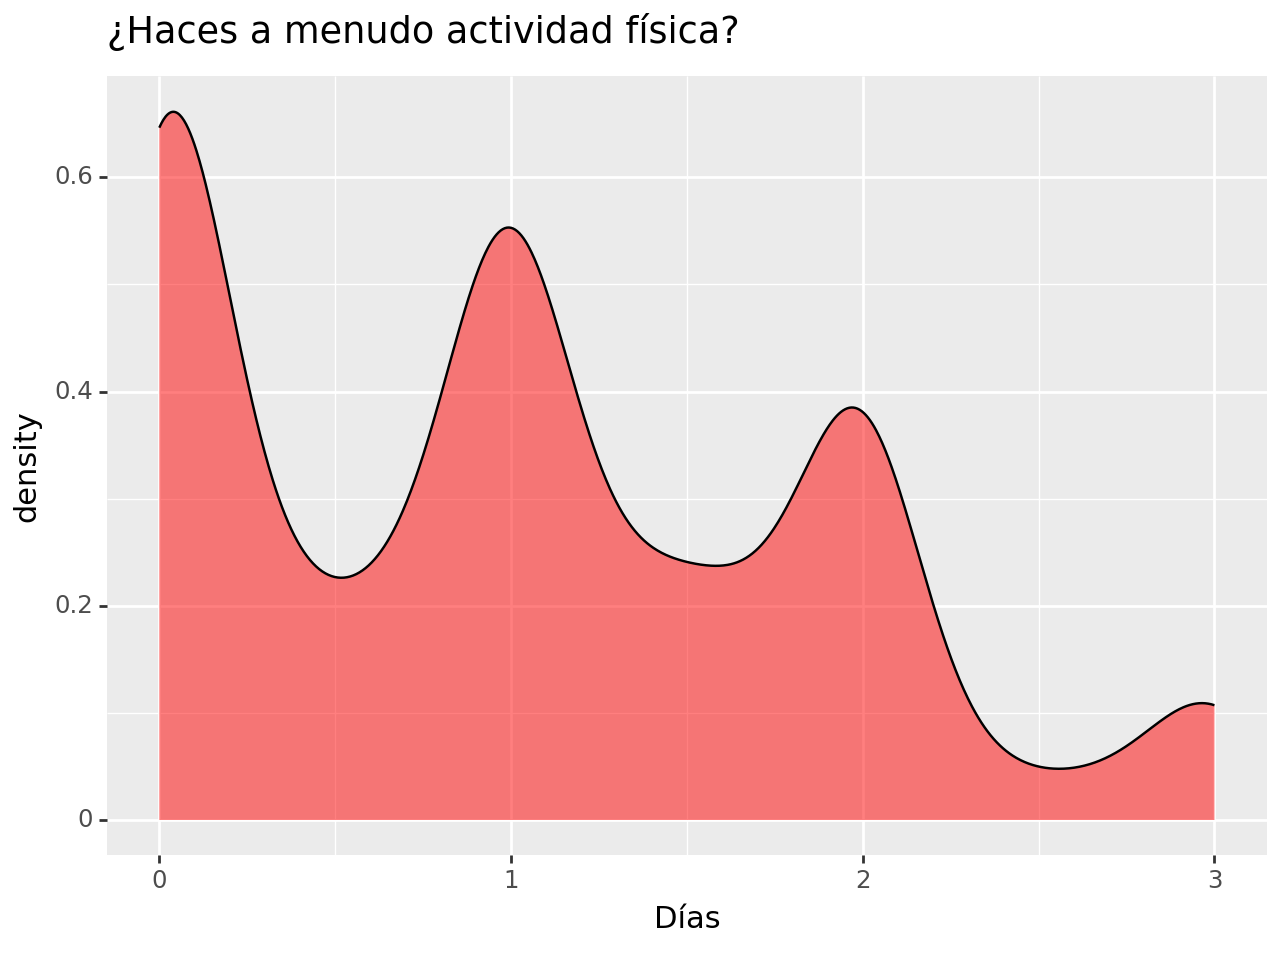


Este campo debe ser categórico, se va a transformar para obtener dicho resultado


In [170]:
print(ggplot(obesidad, aes(x='FAF')) + 
      geom_density(fill='red',alpha=0.5)+
 labs(x='Días',title='¿Haces a menudo actividad física?')
)
print('Este campo debe ser categórico, se va a transformar para obtener dicho resultado')

In [171]:
def ejercicio(deporte):
    if deporte <= 0.5:
        return "No hago"
    elif deporte <= 1.5:
        return "1d-2d"
    elif deporte <= 2.5:
        return "2d-4d"
    else:
        return "4d-5d"

obesidad['physical_activity'] = obesidad['FAF'].apply(ejercicio)
orden_categorias = ["No hago","1d-2d","2d-4d","4d-5d"]
obesidad['physical_activity'] = pd.Categorical(obesidad['physical_activity'], categories=orden_categorias, ordered=True)
print(obesidad['physical_activity'].unique())

['No hago', '4d-5d', '2d-4d', '1d-2d']
Categories (4, object): ['No hago' < '1d-2d' < '2d-4d' < '4d-5d']


C:\Users\alexb\AppData\Local\Temp\ipykernel_20064\2116157306.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\alexb\AppData\Local\Temp\ipykernel_20064\2116157306.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



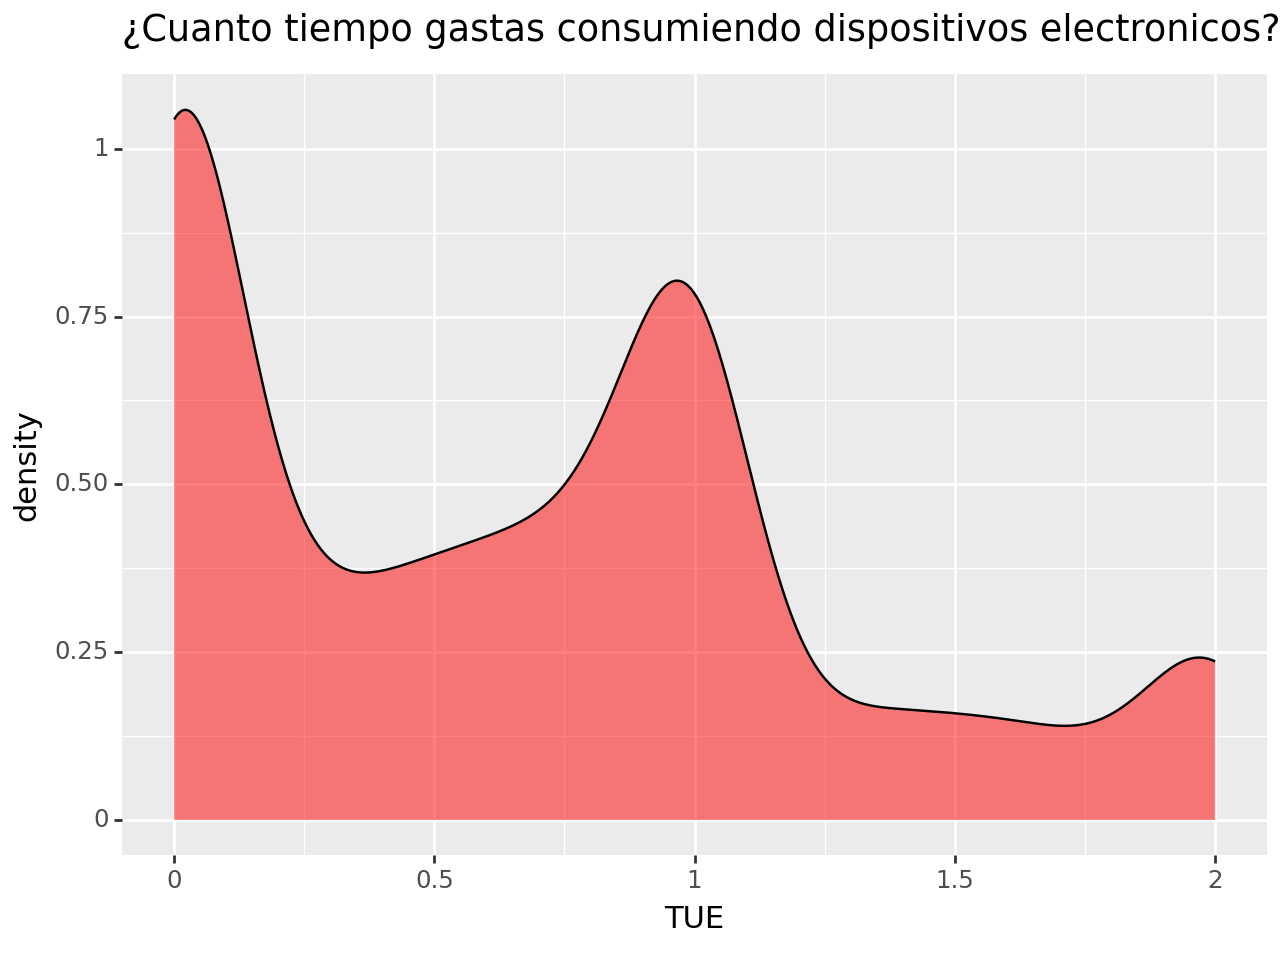


Este campo debe ser categórico, se va a transformar para obtener dicho resultado


In [172]:
print(ggplot(obesidad, aes(x='TUE')) + 
      geom_density(fill='red',alpha=0.5)+
 labs(title='¿Cuanto tiempo gastas consumiendo dispositivos electronicos?')
)
print('Este campo debe ser categórico, se va a transformar para obtener dicho resultado')

In [173]:
def electronica(movil):
    if movil <= 0.5:
        return "0-2h"
    elif movil <= 1.5:
        return "3-5h"
    else:
        return "Más de 5h"

obesidad['electronica'] = obesidad['TUE'].apply(electronica)
orden_categorias = ["0-2h","3-5h","Más de 5h"]
obesidad['electronica'] = pd.Categorical(obesidad['electronica'], categories=orden_categorias, ordered=True)
print(obesidad['electronica'].unique())

['3-5h', '0-2h', 'Más de 5h']
Categories (3, object): ['0-2h' < '3-5h' < 'Más de 5h']


C:\Users\alexb\AppData\Local\Temp\ipykernel_20064\2799942739.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\alexb\AppData\Local\Temp\ipykernel_20064\2799942739.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



De esta manera tenemos pasadas a categóricas todas la variable que deben de ser así

In [174]:
columnas_no_numericas=obesidad.select_dtypes(exclude='number').columns
for campo in columnas_no_numericas:
    print(obesidad[campo].unique())
print('Entre los campos no numéricos no se ve ningún elemento incorrecto')

['Female' 'Male']
['yes' 'no']
['no' 'yes']
['Sometimes', 'Frequently', 'Always', 'no']
Categories (4, object): ['no' < 'Sometimes' < 'Frequently' < 'Always']
['no' 'yes']
['no' 'yes']
['no', 'Sometimes', 'Frequently', 'Always']
Categories (4, object): ['no' < 'Sometimes' < 'Frequently' < 'Always']
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II', 'Obesity_Type_III']
Categories (7, object): ['Insufficient_Weight' < 'Normal_Weight' < 'Overweight_Level_I' < 'Overweight_Level_II' < 'Obesity_Type_I' < 'Obesity_Type_II' < 'Obesity_Type_III']
['Algunas veces', 'Siempre', 'Nunca']
Categories (3, object): ['Nunca' < 'Algunas veces' < 'Siempre']
['Tres', 'Entre 1 y 2', 'Más de tres']
Categories (3, object): ['Entre 1 y 2' < 'Tres' < 'Más de tres']
['1L-2L', 'Más de 2L', 'Menos de 1L']
Categories (3, object): ['Menos de 1L' < '1L-2L' < 'Más de 2L']
['No hag

In [175]:
obesidad.rename(columns={'CALC':'alcohol'}, inplace=True)
obesidad_limpio=obesidad[['gender', 'age', 'height', 'weight', 'family_history_with_overweight','FAVC','vegetables','comidas','CAEC','SMOKE','water','SCC','physical_activity','electronica','alcohol','obesity_type']]

C:\Users\alexb\AppData\Local\Temp\ipykernel_20064\3686228969.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [176]:
obesidad_limpio.head(3)

,gender,age,height,weight,family_history_with_overweight,FAVC,vegetables,comidas,CAEC,SMOKE,water,SCC,physical_activity,electronica,alcohol,obesity_type
0,Female,21.0,1.62,64.0,yes,no,Algunas veces,Tres,Sometimes,no,1L-2L,no,No hago,3-5h,no,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,Siempre,Tres,Sometimes,yes,Más de 2L,yes,4d-5d,0-2h,Sometimes,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,Algunas veces,Tres,Sometimes,no,1L-2L,no,2d-4d,3-5h,Frequently,Normal_Weight


In [177]:
obesidad_limpio.to_csv('obesity_limpio.csv', index=False)

### 1er Insight

¿Como evoluciona el nivel de ingesta de alcohol, actividad fisica, consumo de agua y vegetales según sea el nivel de obesidad?¿Hay algun patrón?

C:\Users\alexb\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning:

geom_bar : Removed 1 rows containing missing values.



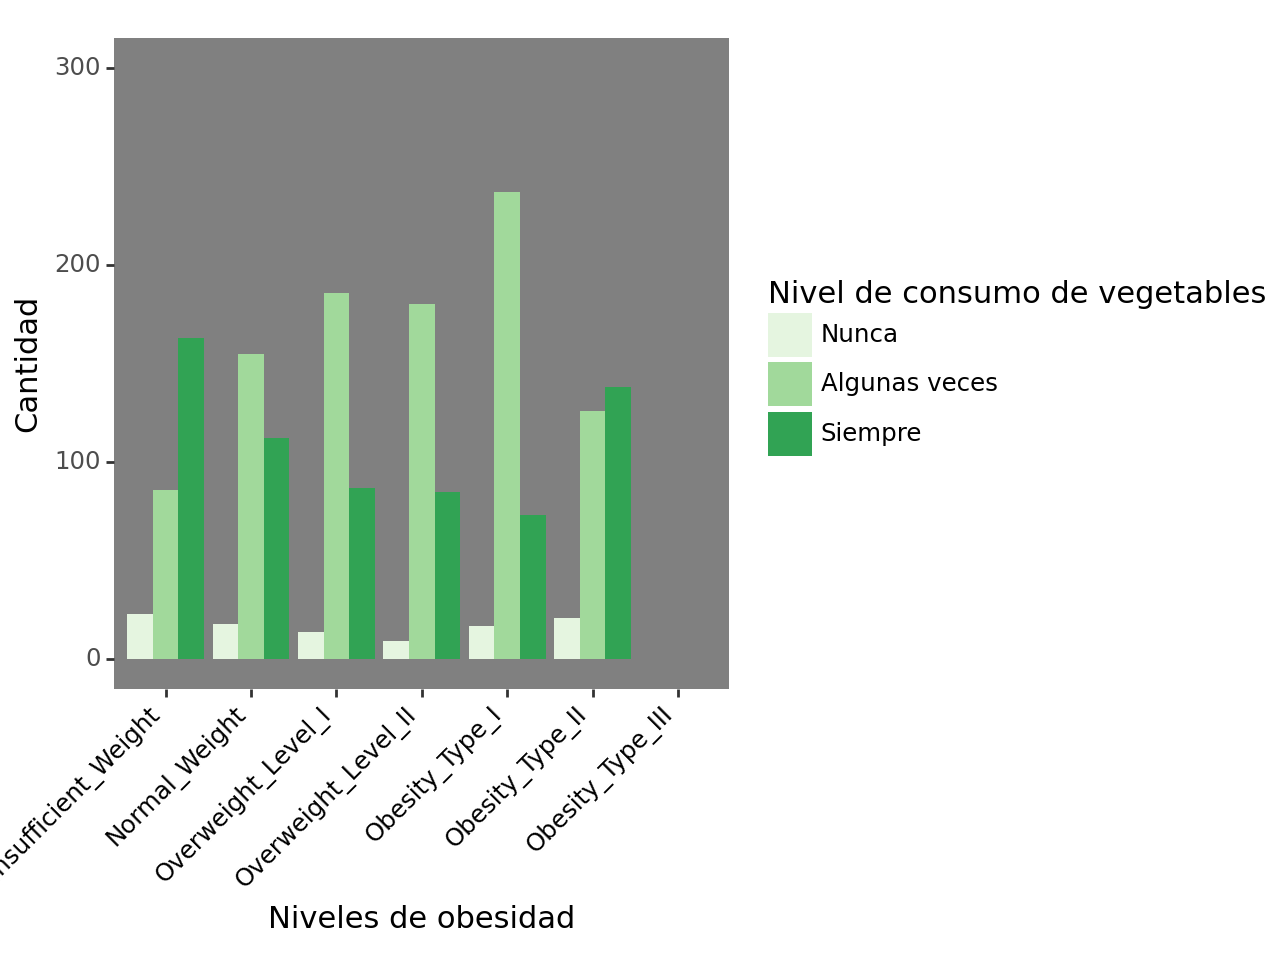

<Figure Size: (640 x 480)>

In [178]:
def fun(obesidad_limpio,columna,paleta):
    return (ggplot(obesidad_limpio[['obesity_type',columna]], aes(x='obesity_type', fill=f'factor({columna})')) + 
        geom_bar(position='dodge') + 
        theme(axis_text_x = element_text(angle = 45, hjust = 1,color = "black"),
              panel_grid_major_x=element_blank(),
              panel_background=element_rect(fill='grey'),
              panel_grid_major_y=element_blank(),
              panel_grid_minor_y=element_blank())+
        labs(x='Niveles de obesidad', y='Cantidad')+
        scale_fill_brewer(palette = paleta,name = f"Nivel de consumo de {columna}")+
        ylim(0, 300)
        )
fun(obesidad_limpio,'vegetables','Greens')


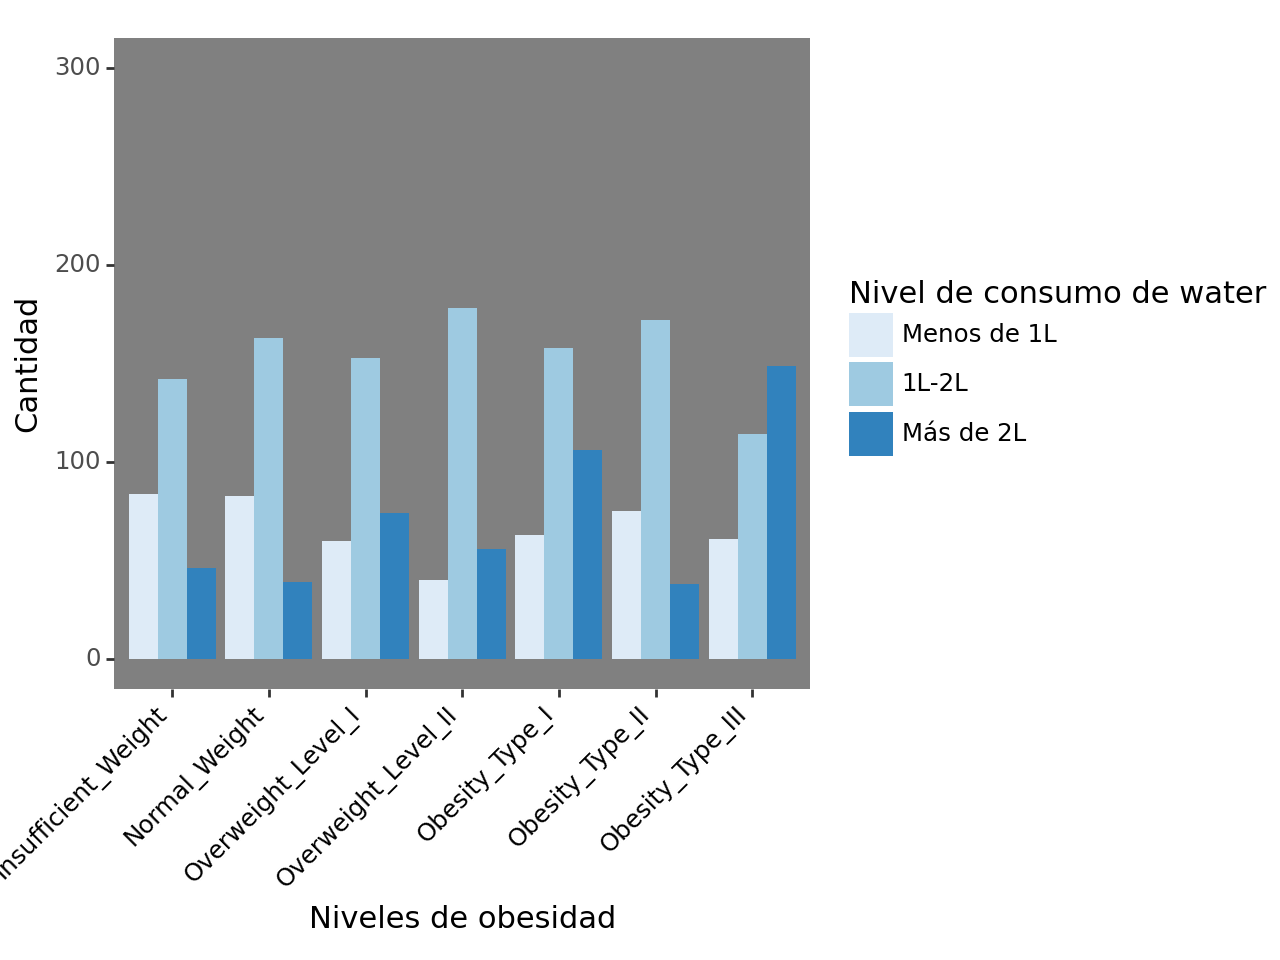

<Figure Size: (640 x 480)>

In [179]:
fun(obesidad_limpio,'water','Blues')


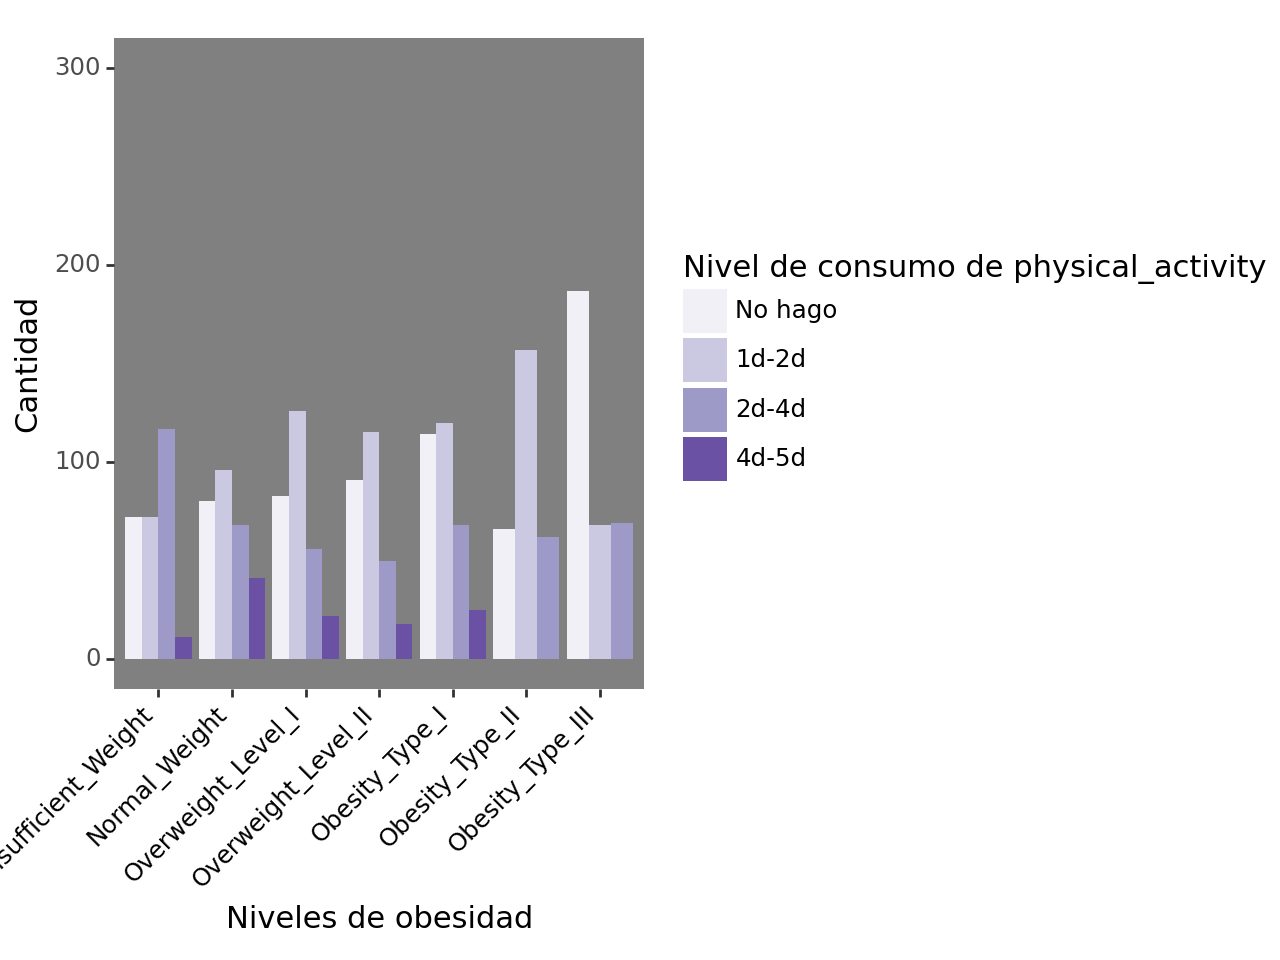

<Figure Size: (640 x 480)>

In [180]:
fun(obesidad_limpio,'physical_activity','Purples')


C:\Users\alexb\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning:

geom_bar : Removed 1 rows containing missing values.



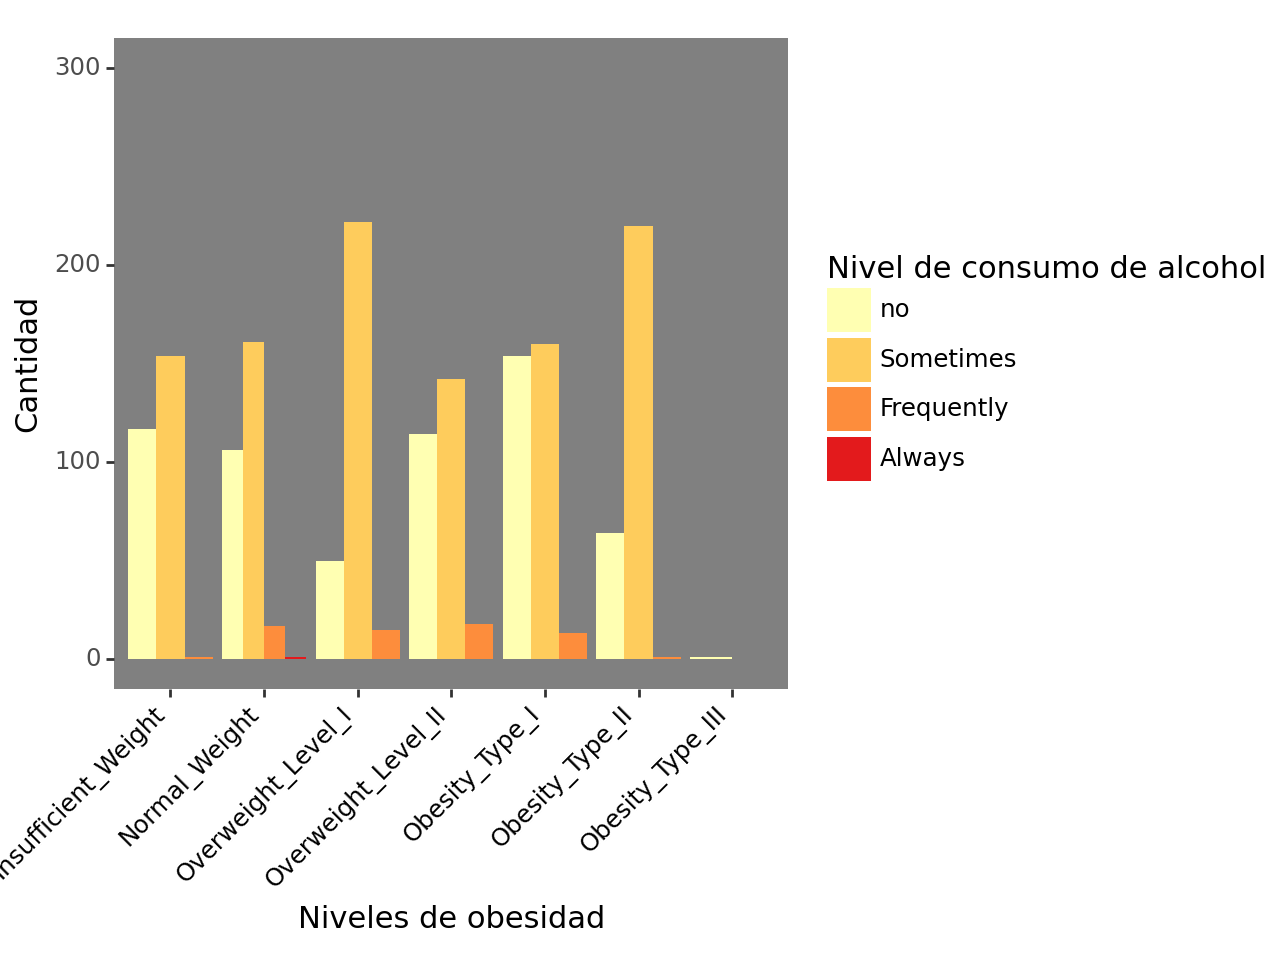

<Figure Size: (640 x 480)>

In [181]:
fun(obesidad_limpio,'alcohol','YlOrRd')

### 2do Insight

¿Cuanta gente de cada grupo sigue una dieta sana(es decir bebe entre 1y 2 litros de agua, hace ejercicio de 2 a 4 dias por semana, no come mucho entre comidas, sin comida con muchas calorias, no fuma no usa demasiado los juegos, bebe a veces o nunca alcohol, comidas principales 3)?

In [182]:
dieta_sana_condiciones = (
    (obesidad_limpio['water'].isin(['1L-2L','Más de 2L'])) &
    (obesidad_limpio['physical_activity'].isin(['4d-5d', '2d-4d'])) &
    (obesidad_limpio['comidas']=="Tres") &
    (obesidad_limpio['FAVC'] == 'no') &
    (obesidad_limpio['SMOKE'] == 'no') &
    (obesidad_limpio['electronica']=='0-2h') &
    (obesidad_limpio['alcohol'].isin(['no', 'Sometimes'])) &
    (obesidad_limpio['CAEC'].isin(['no', 'Sometimes'])))

In [183]:
obesidad_limpio['Salud']='NA'

C:\Users\alexb\AppData\Local\Temp\ipykernel_20064\1805149038.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [184]:
obesidad_limpio.loc[dieta_sana_condiciones,'Salud']='Se cuida'

In [185]:
obesidad_limpio[dieta_sana_condiciones]

,gender,age,height,weight,family_history_with_overweight,FAVC,vegetables,comidas,CAEC,SMOKE,water,SCC,physical_activity,electronica,alcohol,obesity_type,Salud
7,Male,22.0,1.64,53.0,no,no,Algunas veces,Tres,Sometimes,no,1L-2L,no,4d-5d,0-2h,Sometimes,Normal_Weight,Se cuida
12,Male,22.0,1.65,56.0,no,no,Siempre,Tres,Sometimes,no,Más de 2L,no,2d-4d,0-2h,Sometimes,Normal_Weight,Se cuida
44,Male,21.0,1.81,80.0,no,no,Nunca,Tres,no,no,1L-2L,no,2d-4d,0-2h,no,Normal_Weight,Se cuida
75,Female,23.0,1.63,45.0,yes,no,Siempre,Tres,Sometimes,no,Más de 2L,yes,2d-4d,0-2h,no,Insufficient_Weight,Se cuida
83,Female,19.0,1.60,45.0,no,no,Siempre,Tres,no,no,Más de 2L,yes,2d-4d,0-2h,no,Insufficient_Weight,Se cuida
96,Female,23.0,1.66,60.0,yes,no,Algunas veces,Tres,Sometimes,no,1L-2L,no,4d-5d,0-2h,Sometimes,Normal_Weight,Se cuida
153,Male,34.0,1.69,84.0,yes,no,Algunas veces,Tres,Sometimes,no,Más de 2L,no,2d-4d,0-2h,no,Overweight_Level_II,Se cuida
192,Male,20.0,1.83,85.0,yes,no,Siempre,Tres,Sometimes,no,Más de 2L,yes,4d-5d,0-2h,Sometimes,Overweight_Level_I,Se cuida
225,Male,25.0,1.83,121.0,yes,no,Siempre,Tres,Sometimes,no,Más de 2L,no,2d-4d,0-2h,Sometimes,Obesity_Type_II,Se cuida
255,Male,19.0,1.78,81.0,yes,no,Nunca,Tres,Sometimes,no,1L-2L,no,4d-5d,0-2h,no,Overweight_Level_I,Se cuida


In [186]:
healthy_people=obesidad_limpio[dieta_sana_condiciones]#['obesity_type'].value_counts().reset_index()
healthy_people.shape

(15, 17)

In [187]:
dieta_normal_condiciones=(~dieta_sana_condiciones) & ((obesidad_limpio['water'].isin(['Menos de 1L','Más de 2L'])) &
    (obesidad_limpio['physical_activity'].isin(['No hago',])) &
    (obesidad_limpio['comidas'].isin(['Entre 1 y 2', 'Más de tres'])) &
    (obesidad_limpio['FAVC'] == 'yes')  &
    (obesidad_limpio['electronica']=='Más de 5h') &
    (obesidad_limpio['alcohol'].isin(['Frequently', 'Always'])) &
    (obesidad_limpio['CAEC'].isin(['Frequently', 'Always']))|
    (obesidad_limpio['SMOKE'] == 'yes'))

In [188]:
obesidad_limpio.loc[dieta_normal_condiciones,'Salud']='No se cuida'
obesidad_limpio.loc[(~dieta_normal_condiciones)&(~dieta_sana_condiciones),'Salud']='Fofisano'

In [189]:
obesidad_limpio['Salud'].value_counts().reset_index()

,Salud,count
0,Fofisano,1999
1,No se cuida,40
2,Se cuida,15


In [190]:
obesidad_limpio.columns

Index(['gender', 'age', 'height', 'weight', 'family_history_with_overweight',
       'FAVC', 'vegetables', 'comidas', 'CAEC', 'SMOKE', 'water', 'SCC',
       'physical_activity', 'electronica', 'alcohol', 'obesity_type', 'Salud'],
      dtype='object')

In [191]:
fig = px.scatter(obesidad_limpio, x='weight', y='height', color='Salud', size='age',
                 labels={'weight': 'Peso', 'height': 'Altura'},
                 title='Scatter Plot con Plotly Express')

# Mostrar el gráfico
fig.show()

### 3er Insight

¿En cada grupo cómo es el uso de los moviles, hacen mucho deporte? Correlación entre uso de tecnología y actividad física

In [192]:
obesidad_limpio[['obesity_type','electronica']].value_counts().reset_index()

,obesity_type,electronica,count
0,Obesity_Type_III,3-5h,215
1,Overweight_Level_I,0-2h,161
2,Obesity_Type_II,0-2h,161
3,Obesity_Type_I,0-2h,147
4,Overweight_Level_II,3-5h,143
5,Normal_Weight,0-2h,128
6,Insufficient_Weight,3-5h,127
7,Normal_Weight,3-5h,121
8,Obesity_Type_I,3-5h,119
9,Obesity_Type_III,0-2h,109


C:\Users\alexb\anaconda3\Lib\site-packages\plotnine\scales\scale_size.py:49: PlotnineWarning:

Using size for a discrete variable is not advised.



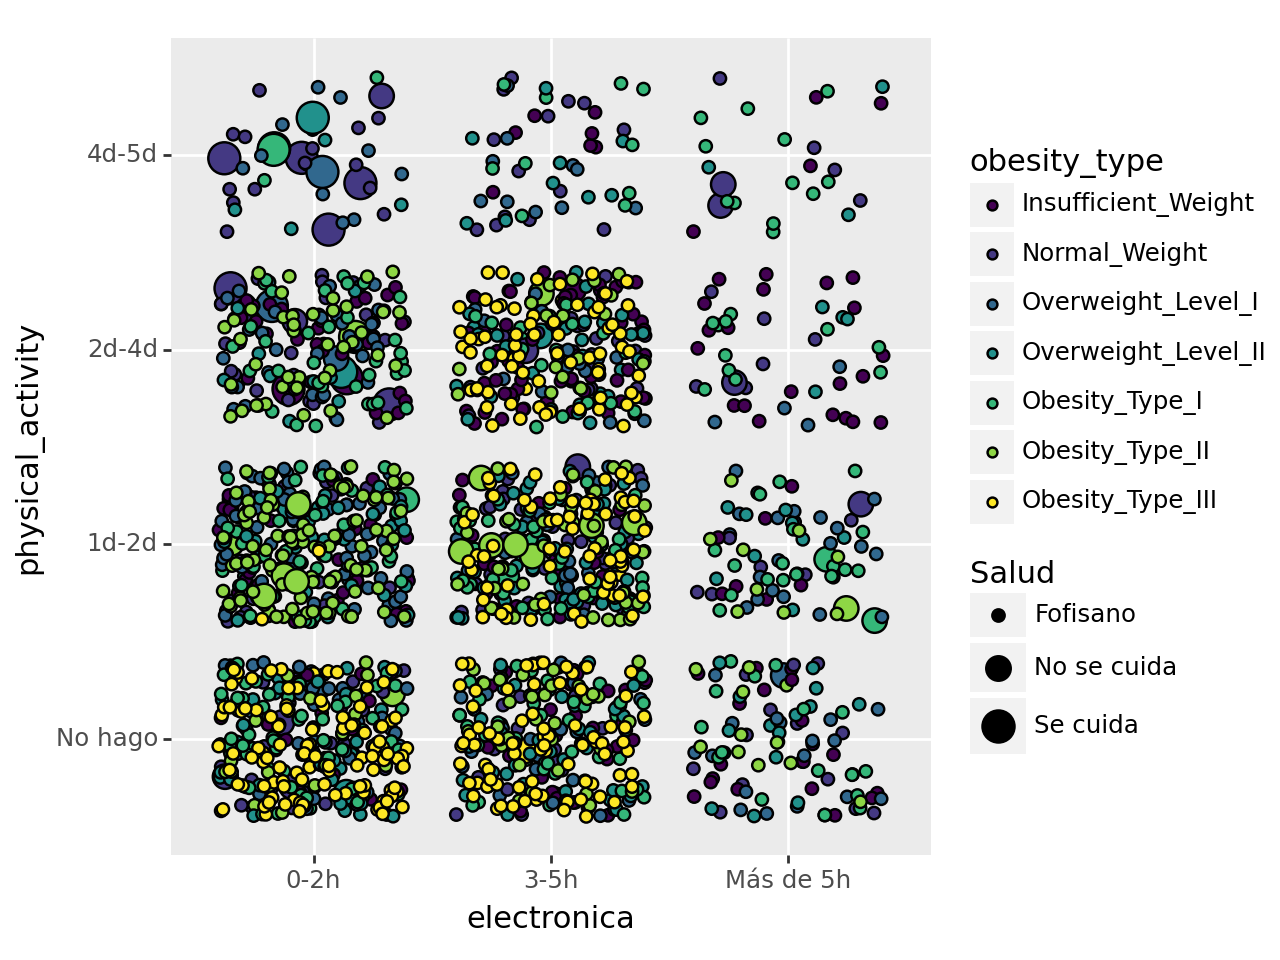

<Figure Size: (640 x 480)>

In [228]:
(ggplot(obesidad_limpio, aes(x = 'electronica', y = 'physical_activity',fill='obesity_type',size='Salud')) + 
  geom_jitter())


In [194]:
for columna in obesidad_limpio.select_dtypes(exclude='number').columns[2:-1]:
    print(f'{columna}: ',obesidad_limpio[columna].unique())

FAVC:  ['no' 'yes']
vegetables:  ['Algunas veces', 'Siempre', 'Nunca']
Categories (3, object): ['Nunca' < 'Algunas veces' < 'Siempre']
comidas:  ['Tres', 'Entre 1 y 2', 'Más de tres']
Categories (3, object): ['Entre 1 y 2' < 'Tres' < 'Más de tres']
CAEC:  ['Sometimes', 'Frequently', 'Always', 'no']
Categories (4, object): ['no' < 'Sometimes' < 'Frequently' < 'Always']
SMOKE:  ['no' 'yes']
water:  ['1L-2L', 'Más de 2L', 'Menos de 1L']
Categories (3, object): ['Menos de 1L' < '1L-2L' < 'Más de 2L']
SCC:  ['no' 'yes']
physical_activity:  ['No hago', '4d-5d', '2d-4d', '1d-2d']
Categories (4, object): ['No hago' < '1d-2d' < '2d-4d' < '4d-5d']
electronica:  ['3-5h', '0-2h', 'Más de 5h']
Categories (3, object): ['0-2h' < '3-5h' < 'Más de 5h']
alcohol:  ['no', 'Sometimes', 'Frequently', 'Always']
Categories (4, object): ['no' < 'Sometimes' < 'Frequently' < 'Always']
obesity_type:  ['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_T

### 4º Insight

¿Qué Grupos de edades consumen más alcohol?

In [195]:
def crear_lista(paso):
    limite_inicial = 14
    limite_final = 40
    return list(zip(np.arange(limite_inicial, limite_final, paso), np.arange(limite_inicial + paso, limite_final + paso, paso)))

def encontrar_intervalo( elemento,lista_tuplas=crear_lista(5)):
    resultado = next((tupla for tupla in lista_tuplas if elemento >= tupla[0] and elemento < tupla[1]), None)
    return f'{resultado[0]}-{resultado[1]}'
obesidad_limpio['Intervalos_de_edad']=obesidad_limpio['age'].apply(encontrar_intervalo)

C:\Users\alexb\AppData\Local\Temp\ipykernel_20064\1190645986.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [196]:
obesidad_limpio

,gender,age,height,weight,family_history_with_overweight,FAVC,vegetables,comidas,CAEC,SMOKE,water,SCC,physical_activity,electronica,alcohol,obesity_type,Salud,Intervalos_de_edad
0,Female,21.000000,1.620000,64.000000,yes,no,Algunas veces,Tres,Sometimes,no,1L-2L,no,No hago,3-5h,no,Normal_Weight,Fofisano,19-24
1,Female,21.000000,1.520000,56.000000,yes,no,Siempre,Tres,Sometimes,yes,Más de 2L,yes,4d-5d,0-2h,Sometimes,Normal_Weight,No se cuida,19-24
2,Male,23.000000,1.800000,77.000000,yes,no,Algunas veces,Tres,Sometimes,no,1L-2L,no,2d-4d,3-5h,Frequently,Normal_Weight,Fofisano,19-24
3,Male,27.000000,1.800000,87.000000,no,no,Siempre,Tres,Sometimes,no,1L-2L,no,2d-4d,0-2h,Frequently,Overweight_Level_I,Fofisano,24-29
4,Male,22.000000,1.780000,89.800000,no,no,Algunas veces,Entre 1 y 2,Sometimes,no,1L-2L,no,No hago,0-2h,Sometimes,Overweight_Level_II,Fofisano,19-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,Siempre,Tres,Sometimes,no,1L-2L,no,2d-4d,3-5h,Sometimes,Obesity_Type_III,Fofisano,19-24
2107,Female,21.982942,1.748584,133.742943,yes,yes,Siempre,Tres,Sometimes,no,1L-2L,no,1d-2d,3-5h,Sometimes,Obesity_Type_III,Fofisano,19-24
2108,Female,22.524036,1.752206,133.689352,yes,yes,Siempre,Tres,Sometimes,no,1L-2L,no,1d-2d,3-5h,Sometimes,Obesity_Type_III,Fofisano,19-24
2109,Female,24.361936,1.739450,133.346641,yes,yes,Siempre,Tres,Sometimes,no,Más de 2L,no,1d-2d,3-5h,Sometimes,Obesity_Type_III,Fofisano,24-29


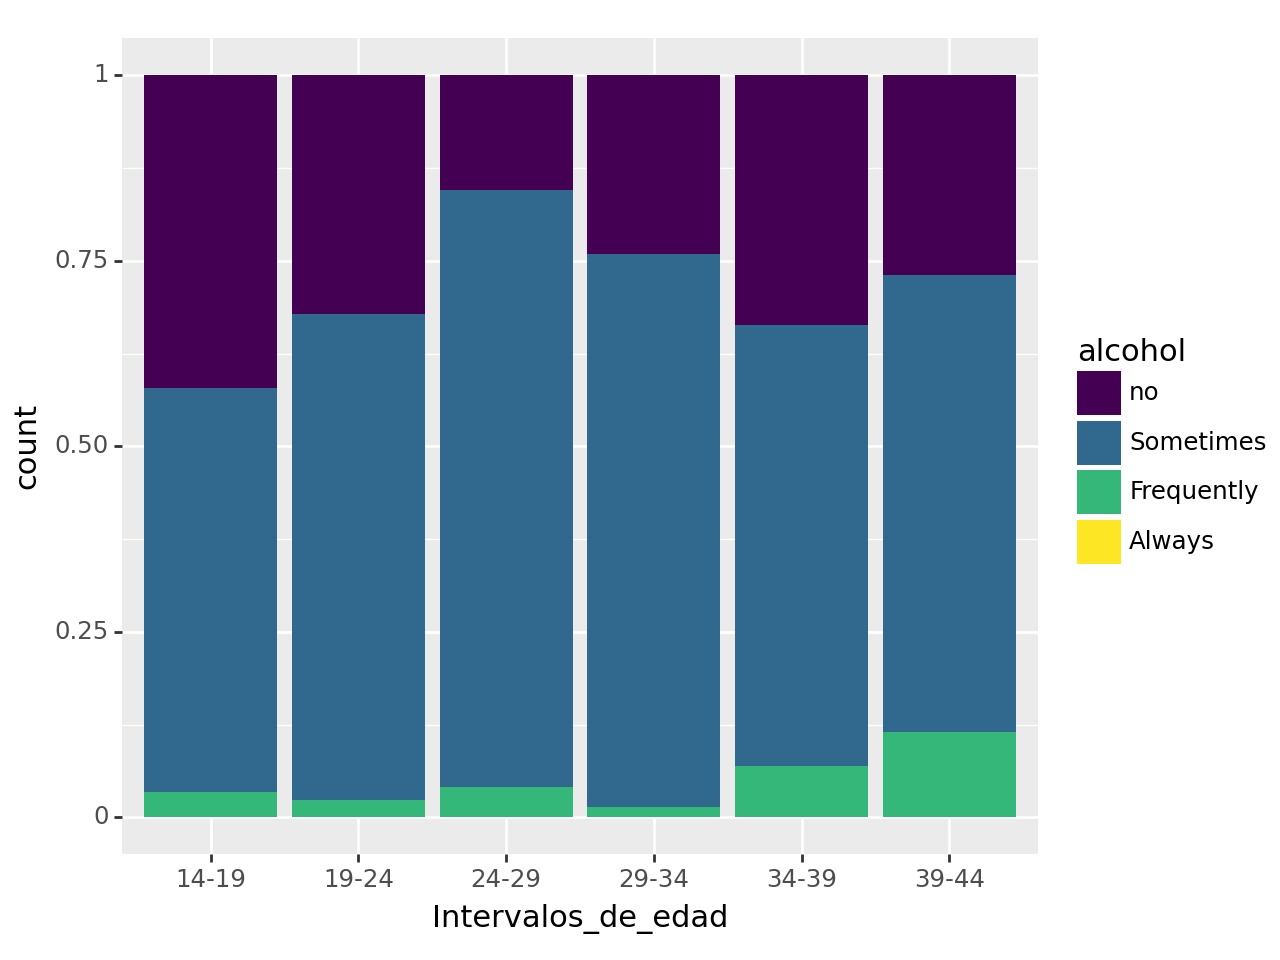

<Figure Size: (640 x 480)>

In [197]:
(ggplot(obesidad_limpio, aes(x='Intervalos_de_edad', fill='alcohol')) + 
    geom_bar(position='fill'))

C:\Users\alexb\anaconda3\Lib\site-packages\plotnine\scales\scale_size.py:49: PlotnineWarning:

Using size for a discrete variable is not advised.



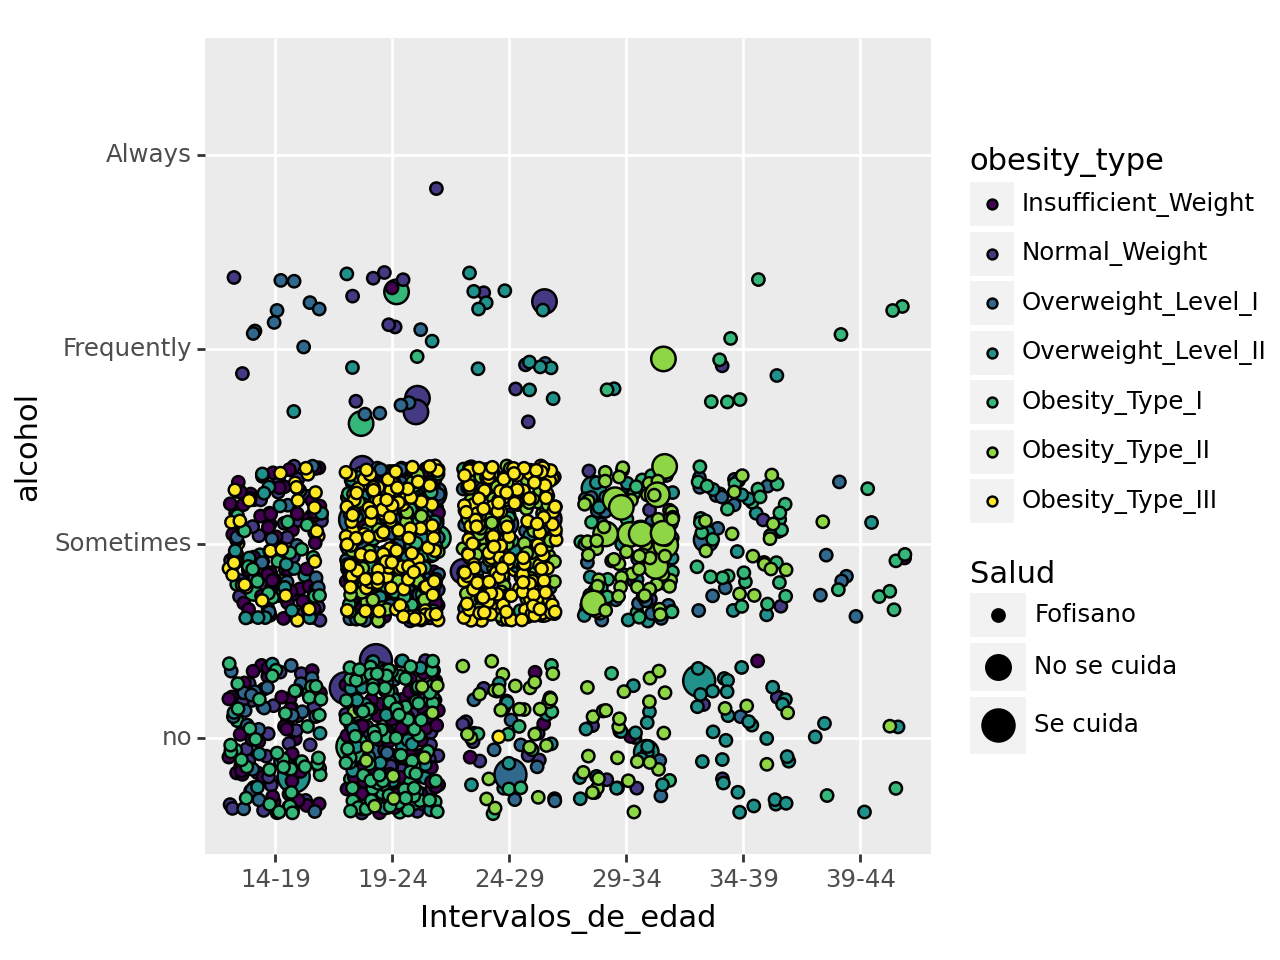

<Figure Size: (640 x 480)>

In [198]:
(ggplot(obesidad_limpio, aes(x = 'Intervalos_de_edad', y = 'alcohol',fill='obesity_type',size='Salud')) + 
  geom_jitter())